# Word2Vec

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located close to one another in the space.

The original Word2Vec paper is:

Mikolov, Tomas; et al. (2013). "Efficient Estimation of Word Representations in Vector Space". arXiv:1301.3781

The following notebook borrows heavily from this [Medium article](https://medium.com/deep-learning-demystified/deep-nlp-word-vectors-with-word2vec-d62cb29b40b3).

## Context

Some preliminary first: let's define a "window dize" for word.  

Let’s consider the sentence: 

> “Deep Learning is very hard and fun”. 

Let's consider a "window size" of 2. What we do is iterate over all the words in the given data, which in this case is just 1 sentence, and then consider a window of words which surround it. Here since our window size is 2, we will consider 2 words behind the word and 2 words after the word. Hence for each word, we will get 4 words associated with it. We will do this for each and every word in the data and collect the word pairs. Let’s visualize this:

![window_size](images/window_size.png)

As we are passing the context window through the text data, we find all word pairs of target and context words to form a dataset in the format of (target word, context word). For the sentence above, it will look like this:

- 1st Window pairs: (Deep, Learning), (Deep, is)
- 2nd Window pairs: (Learning, Deep), (Learning, is), (Learning, very)
- 3rd Window pairs: (is, Deep), (is, Learning), (is, very), (is, hard)
- ...

At the end our target word vs context word data set is going to look like this:

> (Deep, Learning), (Deep, is), (Learning, Deep), (Learning, is), (Learning, very), (is, Deep), (is, Learning), (is, very), (is, hard), (very, learning), (very, is), (very, hard), (very, and), (hard, is), (hard, very), (hard, and), (hard, fun), (and, very), (and, hard), (and, fun), (fun, hard), (fun, and)

This can be considered as our “training data” for word2vec.

## Skip-Gram

In the Skip Gram model, we try to predict each context word given a target word. We use a neural network for the prediction task. The input to the neural network will be a one hot encoded version of the target word and the output is the one hot encoded version of the context word. Hence the size of input and output layers is V (vocabulary count). This neural network has only 1 hidden layer in the middle, the size of this hidden layer determines the size of word vectors we wish to have at the end. We will consider this as 300 for now.

Let’s say V is 10k and one of the target, context word pairs in our dataset is (Deep, Learning). The word2vec training will look like this:

![skip-gram](images/skip-gram.png)

Since this neural network has a total of 3 layers, there will be only 2 weight matrices for the network, W1 and W2. W1 will have dimensions of 10000*300 and W2 will have dimensions of 300*10000.

For our entire (target word, context word) dataset which we have collected from the original textual data, we will pass each pair into the neural network and train it. Essentially the task which the neural network is trying to do here is to guess which context words can appear given a target word. After training the neural network, if we input any target word into the neural network, it will give a vector output which represents the words which have a high probability of appearing near the given word.



## CBOW

Another popular approach is: Continuous Bag of Words (CBOW).  In CBOW, we try to predict the target word given the context words, essentially we just invert the skip gram model to get the CBOW model. It looks like this:

![cbow](images/cbow.png)

Here when we give a vector representation of a group of context words, we will get the most appropriate target word which will be within the vicinity of those words. For example, if we give the sentence: Deep _____ is very hard, where [“Deep”, “is”, “very”, “hard”] represents the context words, the neural network should hopefully give “Learning” as the output target word. This is the core task the neural network tries to train for in the case of CBOW.

## Extracting Word Vectors

To extract the word vectors from the weights of the neural network, we generally consider W1, which is also called the “Embedding Layer”.

When we are training the neural network, the first thing which happens is the multiplication of the input layer with the first weight matrix. This is a visual of that operation:

![embedding](images/embedding.png)

If we represent the weights in a matrix form, we get a matrix with 10k rows and 300 columns. Since the input is a one hot encoded vector ([0,0,…,1,…,0]) which has one 1 in the vector, when we multiply the weight matrix with a one hot encoded vector, one row in the matrix will retain it’s values and all other rows will become 0. Hence the values in the hidden layer will simply be the values of this 1 row.
    
Hence, when we are using a particular word, let’s say the nth word of the vocabulary, we will only be affecting the nth row in the weight matrix because all other rows becomes 0. Therefore we can say that the nth row in the weight matrix contains all the trained information regarding the nth word and this row will be the trained word vector for the nth word. This is how we extract word vectors from a trained word2vec neural network.

![embedding-weights](images/embedding-weights.png)

Note that we are interested in will only be the weights of the network representing the word embeddings.

## Word2Vec Example

The secret to getting Word2Vec really working for you is to have lots and lots of text data. 

gensim provides a nice [Python implementation of Word2Vec](http://radimrehurek.com/gensim/models/word2vec.html) that works perfectly with NLTK corpora. The model takes a list of sentences, and each sentence is expected to be a list of words. This is exactly what is returned by the sents() method of NLTK corpus readers. So let’s compare the semantics of a couple words in a few different NLTK corpora:

In [24]:
import nltk
nltk.download("brown")
nltk.download("movie_reviews")
nltk.download("treebank")

[nltk_data] Downloading package brown to /Users/pmui/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/pmui/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package shakespeare to
[nltk_data]     /Users/pmui/nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!
[nltk_data] Downloading package treebank to /Users/pmui/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [25]:
from gensim.models import Word2Vec
from nltk.corpus import brown, movie_reviews, treebank

In [17]:
b = Word2Vec(brown.sents())
mr = Word2Vec(movie_reviews.sents())
t = Word2Vec(treebank.sents())

2022-09-10 23:57:01,069 : INFO : collecting all words and their counts
2022-09-10 23:57:01,071 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-09-10 23:57:01,519 : INFO : PROGRESS: at sentence #10000, processed 219770 words, keeping 23488 word types
2022-09-10 23:57:01,868 : INFO : PROGRESS: at sentence #20000, processed 430477 words, keeping 34367 word types
2022-09-10 23:57:02,238 : INFO : PROGRESS: at sentence #30000, processed 669056 words, keeping 42365 word types
2022-09-10 23:57:02,584 : INFO : PROGRESS: at sentence #40000, processed 888291 words, keeping 49136 word types
2022-09-10 23:57:02,882 : INFO : PROGRESS: at sentence #50000, processed 1039920 words, keeping 53024 word types
2022-09-10 23:57:03,094 : INFO : collected 56057 word types from a corpus of 1161192 raw words and 57340 sentences
2022-09-10 23:57:03,094 : INFO : Creating a fresh vocabulary
2022-09-10 23:57:03,146 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 reta

In [42]:
b.wv.most_similar(positive=['money'], topn=10)

[('care', 0.9045134782791138),
 ('job', 0.9022853374481201),
 ('trouble', 0.8823750019073486),
 ('chance', 0.8706704378128052),
 ('work', 0.8689790964126587),
 ('getting', 0.8621616959571838),
 ('fear', 0.8609044551849365),
 ('freedom', 0.8540106415748596),
 ('opportunity', 0.8523762226104736),
 ('attitude', 0.8419222235679626)]

In [46]:
mr.wv.most_similar('money', topn=10)

[('him', 0.7431424856185913),
 ('attention', 0.7301454544067383),
 ('home', 0.7287614941596985),
 ('someone', 0.7125682830810547),
 ('chance', 0.705352246761322),
 ('getting', 0.7044075131416321),
 ('trouble', 0.7023466229438782),
 ('death', 0.6968337297439575),
 ('back', 0.6921638250350952),
 ('eyes', 0.6896626949310303)]

In [49]:
t.wv.most_similar(positive=['money'], topn=10)

[('when', 0.999602735042572),
 ('traders', 0.9995506405830383),
 ('only', 0.9995391964912415),
 ('into', 0.9995371699333191),
 ('managers', 0.9995243549346924),
 ('new', 0.9995166063308716),
 ("'", 0.9995143413543701),
 ('most', 0.9995120167732239),
 ('financial', 0.9995065331459045),
 ('trade', 0.9994955658912659)]

It’s pretty clear from the above examples that the semantic similarity of words can vary greatly depending on the textual context. In this case, we’re comparing a wide selection of text from the [brown corpus](https://en.wikipedia.org/wiki/Brown_Corpus) with movie reviews and financial news from the [treebank corpus](http://www.cis.upenn.edu/~treebank/).

Note that if you call most_similar() with a word that was not present in the sentences, you will get a KeyError exception. This can be a common occurrence with smaller corpora like treebank.

To find the length of the word embedding vector:

In [52]:
len(b.wv['university'])

100

To compute the cosine similarity between 2 words:

In [53]:
b.wv.similarity('university','school') > 0.3

True

We can visualize the word embeddings using t-SNE (https://lvdmaaten.github.io/tsne/). For this demonstration, we visualize the first 600 words.

/Users/pmui/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pmui/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


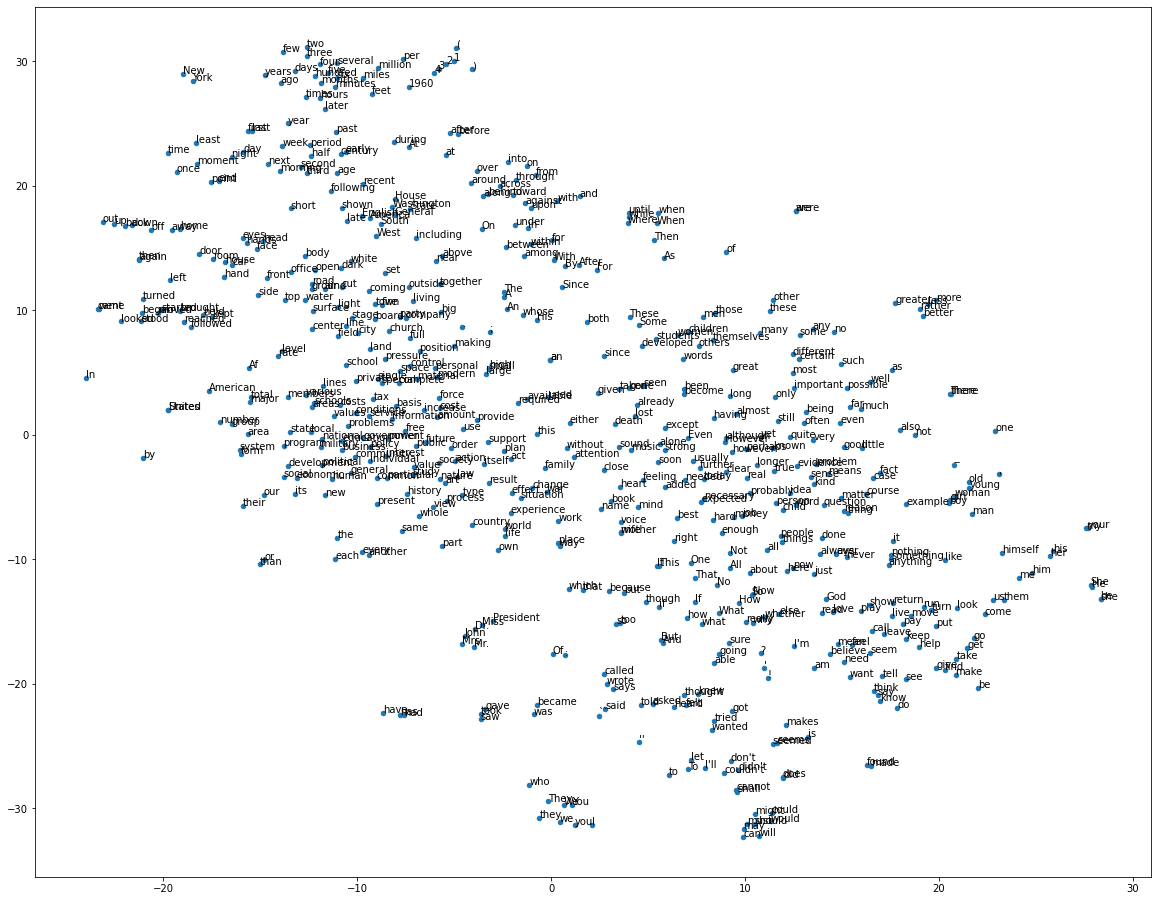

In [83]:
import numpy as np
labels = []
count = 0
max_count = 600
X = np.zeros(shape=(max_count,len(b.wv['university'])))

for term in b.wv.index_to_key:
    X[count] = b.wv[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.rcParams['figure.figsize'] = (20, 16)
plt.show()


## Training Word2Vec

Word2vec accepts several parameters that affect both training speed and quality.

One of them is for pruning the internal dictionary. Words that appear only once or twice in a billion-word corpus are probably uninteresting typos and garbage. In addition, there’s not enough data to make any meaningful training on those words, so it’s best to ignore them:

```
model = Word2Vec(sentences, min_count=10)  # default value is 5
```

A reasonable value for min_count is between 0-100, depending on the size of your dataset.

Another parameter is the size of the NN layers, which correspond to the “degrees” of freedom the training algorithm has:

```
model = Word2Vec(sentences, size=200)  # default value is 100
```

Bigger size values require more training data, but can lead to better (more accurate) models. Reasonable values are in the tens to hundreds.

The last of the major parameters (full list here) is for training parallelization, to speed up training:

```
model = Word2Vec(sentences, workers=4) # default = 1 worker = no parallelization
```

The workers parameter has only effect if you have Cython installed. Without Cython, you’ll only be able to use one core because of the GIL (and word2vec training will be miserably slow).

## Storing & Loading Models

Because word embedding models can take a long time to train.  Here is now to store & load them:

```
model.save('/tmp/mymodel')
new_model = gensim.models.Word2Vec.load('/tmp/mymodel')
```

which uses pickle internally.

In addition, you can load models created by the original C tool, both using its text and binary formats:

```
model = Word2Vec.load_word2vec_format('/tmp/vectors.txt', binary=False)
```

Using gzipped/bz2 input works too, no need to unzip:

```
model = Word2Vec.load_word2vec_format('/tmp/vectors.bin.gz', binary=True)
```

Advanced users can load a model and continue training it with more sentences:

```
model = gensim.models.Word2Vec.load('/tmp/mymodel')
model.train(more_sentences)
```

You may need to tweak the total_words parameter to train(), depending on what learning rate decay you want to simulate.

## Common Word2Vec Tasks

Word2vec supports several word similarity tasks out of the box:

```
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
[('queen', 0.50882536)]
model.doesnt_match("breakfast cereal dinner lunch";.split())
'cereal'
model.similarity('woman', 'man')
0.73723527
```

If you need the raw output vectors in your application, you can access these either on a word-by-word basis

```
model['computer']  # raw NumPy vector of a word
array([-0.00449447, -0.00310097,  0.02421786, ...], dtype=float32)
```